In [33]:
#deep learning prediction model
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

In [34]:
df = pd.read_csv('C:/Users/culle/Documents/bills/bill_2.csv')

In [99]:
df.head()

392

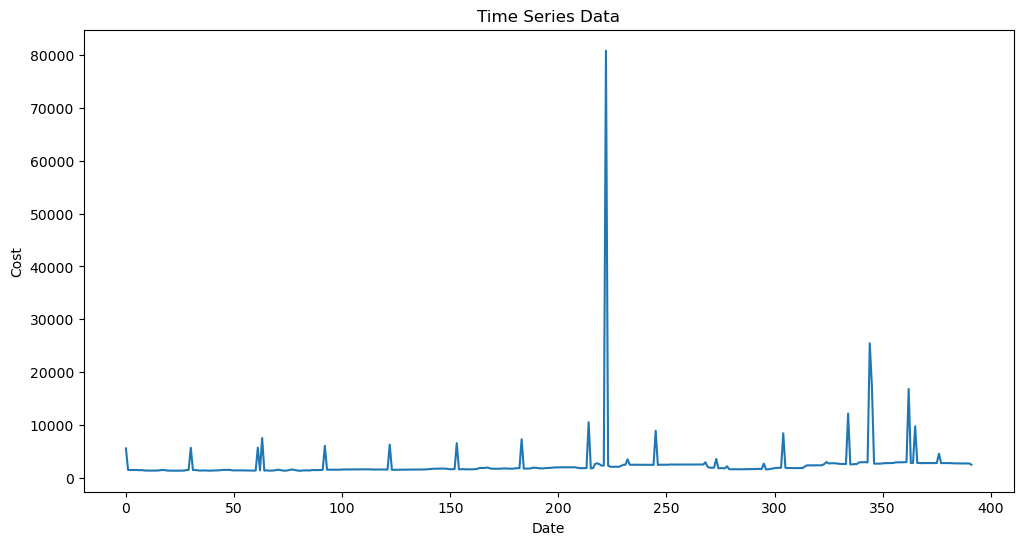

In [36]:
#visualizing data
df['cost'].plot(figsize = (12,6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.show()

In [84]:
#split into training and testing sets
X = df['time'].values.reshape(-1,1)
y = df['cost'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

In [91]:
#normalize data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform([[i] for i in range(len(df)-1)])  # Assuming df is a DataFrame or list
X_test_scaled = scaler.transform([[i] for i in range(len(df)-1)])  # Assuming X_test is a list or array

In [92]:
#create deep learning model
mode = keras.Sequential([
    keras.layers.Dense(64,activation = 'relu',input_shape = (1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

In [93]:
#compile
mode.compile(optimizer='adam', loss='mean_squared_error')

In [94]:
#Train model
mode.fit(X_train_scaled,y_train,epochs = 100,batch_size = 32, verbose = 1)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 25973784.0000
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 25972380.0000
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 25970554.0000
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 25967740.0000
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 25963620.0000
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 25957130.0000
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 25948552.0000
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 25936534.0000
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 25921206.0000
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 25901488.0000
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 25875710.0000
Epoch 12/100
13/13 [=====================

13/13 [==============================] - 0s 1ms/step - loss: 19932836.0000
Epoch 95/100
13/13 [==============================] - 0s 1ms/step - loss: 19930676.0000
Epoch 96/100
13/13 [==============================] - 0s 1ms/step - loss: 19930838.0000
Epoch 97/100
13/13 [==============================] - 0s 1ms/step - loss: 19929530.0000
Epoch 98/100
13/13 [==============================] - 0s 1ms/step - loss: 19929704.0000
Epoch 99/100
13/13 [==============================] - 0s 1ms/step - loss: 19927834.0000
Epoch 100/100
13/13 [==============================] - 0s 1ms/step - loss: 19926564.0000


In [95]:
# Evaluate the model
loss = mode.evaluate(X_test_scaled, y_train)
print('Test Loss:', loss)

# Make predictions
predictions = mode.predict(X_test_scaled)

13/13 [==============================] - 0s 683us/step - loss: 19924890.0000
Test Loss: 19924890.0
13/13 [==============================] - 0s 2ms/step


In [98]:
# Print sample predictions from cells 1-10
for i in range(20):
    print('Actual:', y_train[i], 'Predicted:', predictions[i])

Actual: [1823.620887] Predicted: [1654.823]
Actual: [2453.723501] Predicted: [1658.679]
Actual: [1421.522335] Predicted: [1662.5349]
Actual: [2724.075429] Predicted: [1666.391]
Actual: [2003.028844] Predicted: [1670.2468]
Actual: [1395.938022] Predicted: [1674.103]
Actual: [2494.983684] Predicted: [1677.9589]
Actual: [1642.45467] Predicted: [1681.815]
Actual: [1589.920962] Predicted: [1685.6708]
Actual: [1399.991462] Predicted: [1689.5269]
Actual: [2006.375486] Predicted: [1693.3827]
Actual: [1653.721035] Predicted: [1697.2388]
Actual: [1879.710089] Predicted: [1701.0947]
Actual: [1847.829992] Predicted: [1704.9507]
Actual: [16823.92262] Predicted: [1708.8065]
Actual: [1535.456313] Predicted: [1712.6626]
Actual: [2788.85012] Predicted: [1716.5186]
Actual: [1672.146935] Predicted: [1720.3746]
Actual: [2642.157263] Predicted: [1724.2307]
Actual: [1398.823094] Predicted: [1728.0867]
